## Convolutional Neural Network 



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [4]:
# Importing libs
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [5]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = r'C:\Pythonchik\ML_Techniques_ITMO_2021\Dataset\train'
val =   r'C:\Pythonchik\ML_Techniques_ITMO_2021\Dataset\val'
test =  r'C:\Pythonchik\ML_Techniques_ITMO_2021\Dataset\test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [6]:
# Data preparation

datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [7]:
model = Sequential()

# 1: +Convolutional
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
# model.add(Activation('relu'))
# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# model.add(Activation('relu'))
# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(Activation('relu'))
# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64, activation='relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1, activation='sigmoid'))
# model.add(Activation('sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history_cnn = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\2028992165.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_cnn = model.fit_generator(


Epoch 1/10
312/312 [==============================] - 145s 463ms/step - loss: 0.6039 - accuracy: 0.6671 - val_loss: 0.5088 - val_accuracy: 0.7586
Epoch 2/10
312/312 [==============================] - 88s 283ms/step - loss: 0.5000 - accuracy: 0.7581 - val_loss: 0.4961 - val_accuracy: 0.7475
Epoch 3/10
312/312 [==============================] - 90s 287ms/step - loss: 0.4397 - accuracy: 0.7988 - val_loss: 0.4130 - val_accuracy: 0.8063
Epoch 4/10
312/312 [==============================] - 89s 285ms/step - loss: 0.3954 - accuracy: 0.8244 - val_loss: 0.4138 - val_accuracy: 0.8047
Epoch 5/10
312/312 [==============================] - 88s 282ms/step - loss: 0.3556 - accuracy: 0.8462 - val_loss: 0.4317 - val_accuracy: 0.8170
Epoch 6/10
312/312 [==============================] - 91s 291ms/step - loss: 0.3142 - accuracy: 0.8664 - val_loss: 0.3873 - val_accuracy: 0.8331
Epoch 7/10
312/312 [==============================] - 90s 289ms/step - loss: 0.2715 - accuracy: 0.8837 - val_loss: 0.3830 - val_a

In [10]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\2304885300.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.13%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

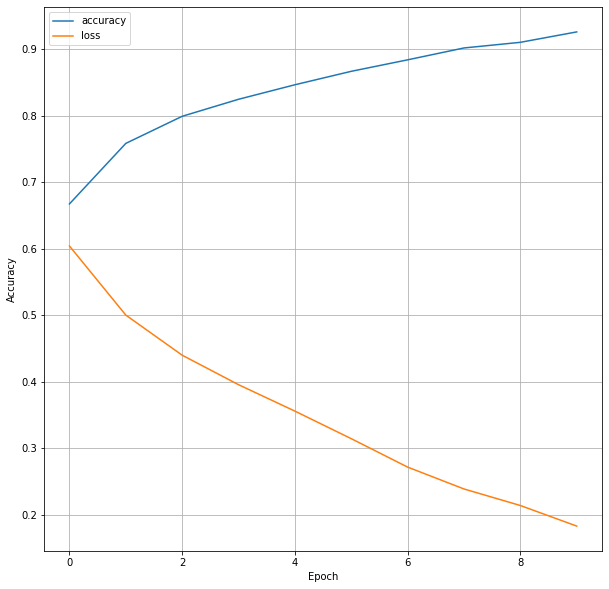

In [18]:
# summarize history for loss and acc
plt.figure(figsize=(10,10))
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['loss'])
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='best')

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [19]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58900480/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [20]:
# add layers to VGG16:

model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)
# + flattening
model_vgg16.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_vgg16.add(Dense(256, activation="relu"))
# + ReLu
# + Dropout
model_vgg16.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_vgg16.add(Dense(1,activation="sigmoid"))
# + sigmoid
model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

C:\Users\sorok\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model_VGG16_hist = model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\781870829.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_VGG16_hist = model_vgg16.fit_generator(


312/312 [==============================] - 450s 1s/step - loss: 0.5188 - accuracy: 0.7331 - val_loss: 0.3550 - val_accuracy: 0.8602
Epoch 2/5
312/312 [==============================] - 428s 1s/step - loss: 0.3426 - accuracy: 0.8493 - val_loss: 0.2959 - val_accuracy: 0.8820
Epoch 3/5
312/312 [==============================] - 429s 1s/step - loss: 0.3001 - accuracy: 0.8720 - val_loss: 0.2695 - val_accuracy: 0.8984
Epoch 4/5
312/312 [==============================] - 428s 1s/step - loss: 0.2764 - accuracy: 0.8831 - val_loss: 0.2595 - val_accuracy: 0.9021
Epoch 5/5
312/312 [==============================] - 431s 1s/step - loss: 0.2608 - accuracy: 0.8919 - val_loss: 0.2468 - val_accuracy: 0.9108


In [24]:
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\744118947.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 89.18%


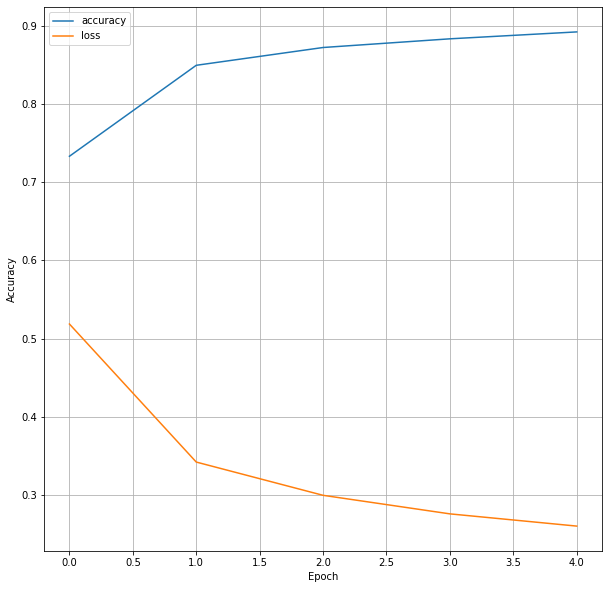

In [29]:
plt.figure(figsize=(10,10))
plt.plot(model_VGG16_hist.history['accuracy'])
plt.plot(model_VGG16_hist.history['loss'])
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='best')

In [26]:
# Now let's try the pretrained resnet model
from tensorflow.keras.applications import ResNet50
resnet_net = ResNet50(weights='imagenet', 
                  include_top=False,     
                  input_shape=(150, 150, 3))
resnet_net.trainable = False              
resnet_net.summary()

94781440/94765736 [==============================] - 8s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat

In [27]:
# add layers to resnet
model_resnet = Sequential()
model_resnet.add(resnet_net)
# + flattening
model_resnet.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_resnet.add(Dense(256, activation="relu"))
# + ReLu
# + Dropout
model_resnet.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_resnet.add(Dense(1,activation="sigmoid"))
# + sigmoid
model_resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36,695,425
Trainable params: 13,107,713
Non-trainable params: 23,587,712
_________________________________________________________________


In [31]:
model_resnet.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

In [32]:
model_ResNet_hist = model_resnet.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5


C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\3064220928.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_ResNet_hist = model_resnet.fit_generator(


312/312 [==============================] - 313s 997ms/step - loss: 0.6895 - accuracy: 0.5699 - val_loss: 0.6528 - val_accuracy: 0.6143
Epoch 2/5
312/312 [==============================] - 323s 1s/step - loss: 0.6460 - accuracy: 0.6266 - val_loss: 0.6286 - val_accuracy: 0.6620
Epoch 3/5
312/312 [==============================] - 307s 984ms/step - loss: 0.6304 - accuracy: 0.6507 - val_loss: 0.6154 - val_accuracy: 0.6785
Epoch 4/5
312/312 [==============================] - 305s 978ms/step - loss: 0.6198 - accuracy: 0.6623 - val_loss: 0.6066 - val_accuracy: 0.6768
Epoch 5/5
312/312 [==============================] - 310s 995ms/step - loss: 0.6104 - accuracy: 0.6684 - val_loss: 0.6007 - val_accuracy: 0.6830


In [33]:
scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

C:\Users\sorok\AppData\Local\Temp\ipykernel_18128\68345648.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_resnet.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 68.63%


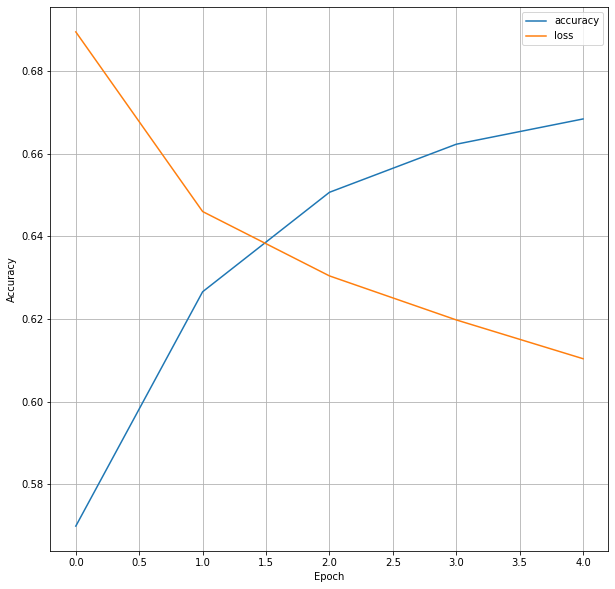

In [34]:
plt.figure(figsize=(10,10))
plt.plot(model_ResNet_hist.history['accuracy'])
plt.plot(model_ResNet_hist.history['loss'])
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='best')

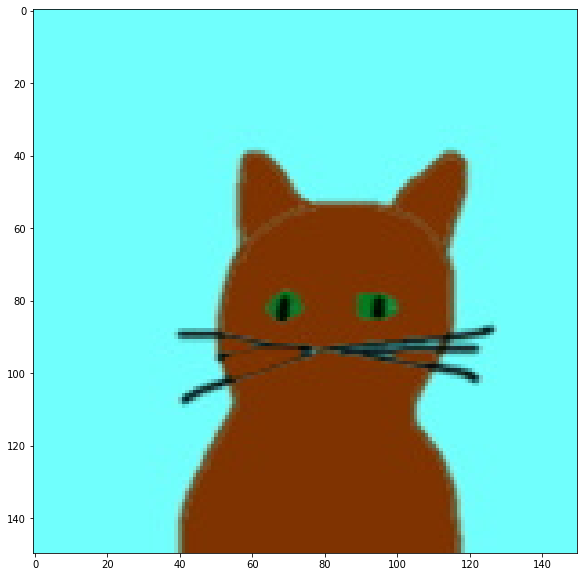

In [35]:
# Make a prediction based on my image
cat_img = r'C:\Pythonchik\ML_Techniques_ITMO_2021\Dataset\my_paint_cat.jpg'
img = mpimg.imread(cat_img)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

In [39]:
# Now let's try the vgg16 model:
image = cv2.imread(cat_img)
image = np.array(image).reshape((1, 150, 150, 3))
result = model_vgg16.predict(image)
if result.astype(int).item() == 0:
    print("This is cat!")
elif result.astype(int).item() == 1:
    print("This is dog!")

This is dog!


In [40]:
# It seems to be wrong, but resnet model:
image = cv2.imread(cat_img)
image = np.array(image).reshape((1, 150, 150, 3))
result = model_resnet.predict(image)
if result.astype(int).item() == 0:
    print("This is cat!")
elif result.astype(int).item() == 1:
    print("This is dog!")

This is cat!


In [ ]:
# Resnet got it right!